In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import sys, os; sys.path.append('../')
import BaryonForge as bfg
import pyccl as ccl
from astropy.io import fits

#Load cosmology object from CCL. Linear P(k) is needed since we use it for 2-halo term.
#We don't use P(k) anywhere else in this model, so it's ok to use linear P(k) throughout
#I use the specific values from S19 now
cosmo = ccl.Cosmology(Omega_c = 0.32 - 0.048 , Omega_b = 0.048, h=0.67, sigma8=0.83, n_s=0.96,
                      matter_power_spectrum='linear')
h = cosmo.cosmo.params.h

#Config params. Let's use the default values as deemed in Schneider19
bpar = dict(theta_ej = 4, theta_co = 0.1, 
            mu_beta = 1, #We set this to 1 and then change M_c to get the right \beta value
            eta = 0.3, eta_delta = 0.3, 
            tau = 0, tau_delta = 0, #They don't use a tau so we zero ours
            A = 0.09/2, #Factor 2 Needed so that the high-mass behaviors of our model is same as theirs
            M1 = 2.5e11/h,
            epsilon_h = 0.015, eta_cga = 0.6, a = 0.3, n = 2, epsilon = 4, p = 0.3, q = 0.707, 
            cdelta = 6.71, #This value is what I found was needed to reproduce their DMO profiles. The value is given in S15 too.
            gamma = 2, delta = 7)

In [2]:
#Some plotting configs
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=22)
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
#Let's load some profiles that I scrapped from left panel of Fig 1 in Schneider 19

l = [[i + '_X', i + '_Y'] for i in ['STAR', 'GAS1', 'GAS2', 'GAS3', '2HALO', 'TOTAL', 'R200', 'DMO', 'DMB1', 'DMB2', 'DMB3']]
l = [item for sublist in l for item in sublist]
S19 = np.genfromtxt('./S19_Fig1_Scrapped.csv', delimiter=',', skip_header=2, names=l)

# Plot different components

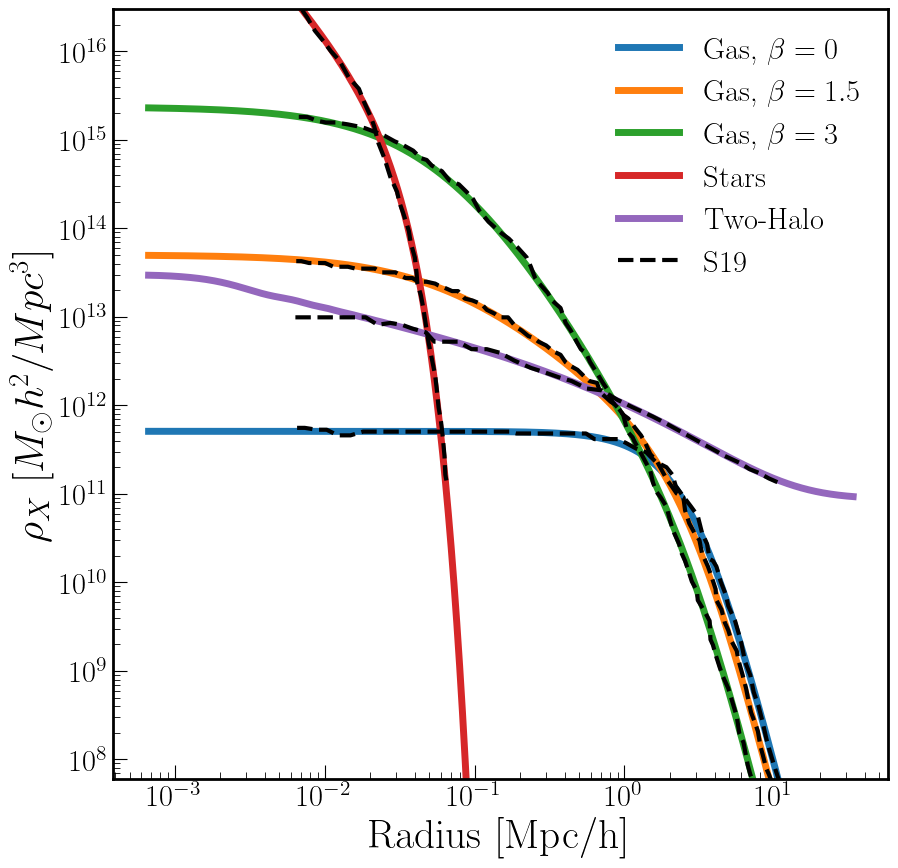

In [ ]:
plt.figure(figsize = (10, 10))
plt.loglog()
plt.ylim(6e7, 3e16)

#Note that this radius is comoving Mpc
r    = np.geomspace(1e-3, 50, 1000)

p = bfg.Gas(M_c = np.inf, **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h, p/h**2, lw = 5, label = r'Gas, $\beta = 0$')

p = bfg.Gas(M_c = 1e14/h, **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,p/h**2, lw = 5, label = r'Gas, $\beta = 1.5$')

p = bfg.Gas(M_c = 1e-10,  **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,p/h**2, lw = 5, label = r'Gas, $\beta = 3$')

p = bfg.Stars(**bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,p/h**2, lw = 5, label = 'Stars')

p = bfg.TwoHalo(**bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,p/h**2, lw = 5, label = 'Two-Halo')


for i in ['STAR', 'GAS1', 'GAS2', 'GAS3', '2HALO']:    
    plt.plot(S19[i + '_X'], S19[i + '_Y'], color = 'k', ls = '--', lw = 3,
             label = 'S19' if i == 'STAR' else None)
    
plt.xlabel(r'Radius [Mpc/h]', size = 30)
plt.ylabel(r'$\rho_X$ [$M_{\odot} h^2 / Mpc^3$]', size = 30)
plt.legend(frameon = False, fontsize = 22)

# Now the DMO/DMB profiles

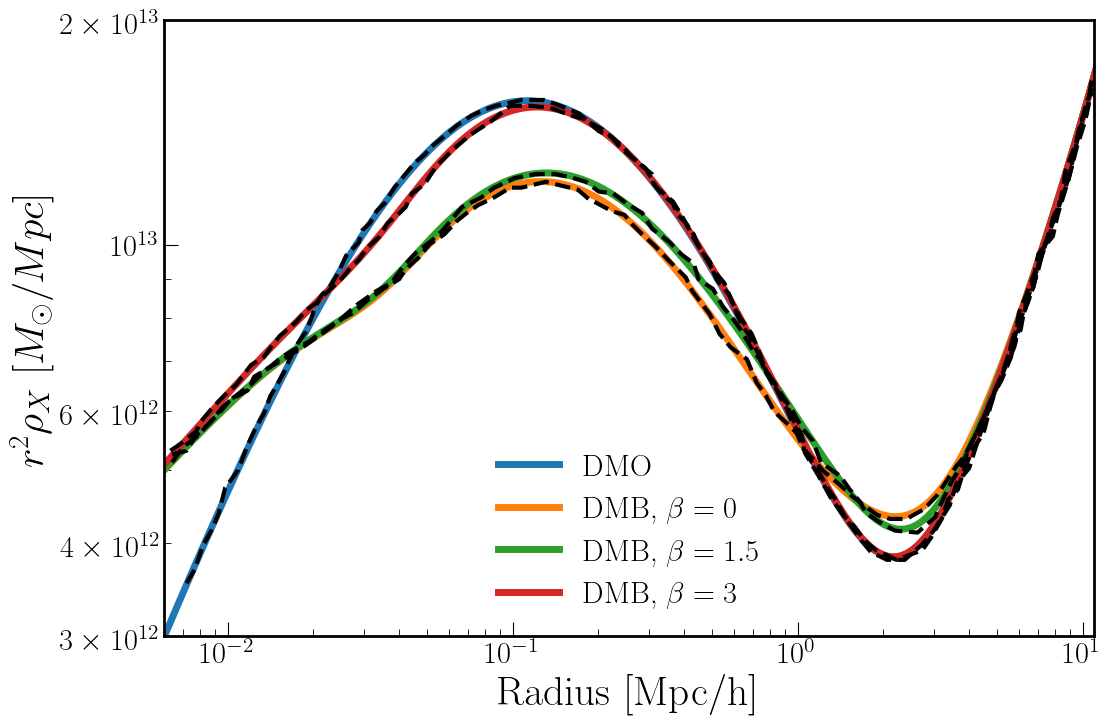

In [ ]:
plt.figure(figsize = (12, 8))
plt.loglog()
plt.ylim(3e12, 2e13)
plt.xlim(6e-3, 1.1e1)


#Note that this radius is comoving Mpc
r    = np.geomspace(1e-3, 50, 1000)


p = bfg.DarkMatterOnly(**bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,r**2*p, lw = 5, label = 'DMO')


p = bfg.DarkMatterBaryon(M_c = np.inf, **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,r**2*p, lw = 5, label = r'DMB, $\beta = 0$')

p = bfg.DarkMatterBaryon(M_c = 1e14/h, **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,r**2*p, lw = 5, label = r'DMB, $\beta = 1.5$')

p = bfg.DarkMatterBaryon(M_c = 1e-10, **bpar).real(cosmo, r,1e14/h, 1)
plt.plot(r*h,r**2*p, lw = 5, label = r'DMB, $\beta = 3$')


for i in ['DMO', 'DMB1', 'DMB2', 'DMB3']:
    plt.plot(S19[i + '_X'], S19[i + '_Y'], color = 'k', ls = '--', lw = 3)
    
    
plt.xlabel(r'Radius [Mpc/h]', size = 30)
plt.ylabel(r'$r^2 \rho_X$ [$M_{\odot} / Mpc$]', size = 30)
plt.legend(frameon = False, fontsize = 22)